# ECE C247 - Neural Networks & Deep Learning
# EEG Dataset

# Group Members
### Anirudh Krishna 
### Swagath Babu 
### Jacob Thomas

# Load the Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from models import *
from solver import *
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Defining the Parameters

In [3]:
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100

### We tried different values for the Learning Rate and for the Decay. However, the values defined below are considered the best in order to obtain good performance. 

## Load Data

In [4]:
data_path = "/content/drive/My Drive/Dataset/C247/"

# load data files
X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, subjects=[8], verbose=True)

Training/Valid data shape: (232, 22, 1000)
Test data shape: (50, 22, 1000)


## Preprocessing

In [5]:
# filter inputs
X_train_valid = filter_data(X_train_valid, fs=250, order=6, lowcut=7, highcut=30)
X_test = filter_data(X_test, fs=250, order=6, lowcut=7, highcut=30)

# smooth inputs
X_train_valid = smooth_data(X_train_valid, ws=5)
X_test = smooth_data(X_test, ws=5)

## PyTorch Loading

In [6]:
# set up PyTorch dataloaders
data_loaders = dataloader_setup(X_train_valid, y_train_valid, X_test, y_test, batch_size=BATCH_SIZE)

# Comparing different models for Subject 8 and giving a comparative perspective

### The model architecture can found in the models.py file

## CNN

In [7]:
model = CNN().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/185 (0.00%)]		Loss: 1.51255
	Train loss: 0.04557, Accuracy: 43/185 (23.24%)
	Validation loss: 0.02889, Accuracy: 17/47 (36.17%)
	Test loss: 0.02796, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 2 [0/185 (0.00%)]		Loss: 1.44876
	Train loss: 0.04483, Accuracy: 45/185 (24.32%)
	Validation loss: 0.02889, Accuracy: 18/47 (38.30%)
	Test loss: 0.02802, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 3 [0/185 (0.00%)]		Loss: 1.51631
	Train loss: 0.04406, Accuracy: 60/185 (32.43%)
	Validation loss: 0.02918, Accuracy: 18/47 (38.30%)
	Test loss: 0.02844, Accuracy: 13/50 (26.00%)

Training Progress: 	Epoch 4 [0/185 (0.00%)]		Loss: 1.48835
	Train loss: 0.04357, Accuracy: 54/185 (29.19%)
	Validation loss: 0.02904, Accuracy: 16/47 (34.04%)
	Test loss: 0.02864, Accuracy: 13/50 (26.00%)

Training Progress: 	Epoch 5 [0/185 (0.00%)]		Loss: 1.37902
	Train loss: 0.04377, Accuracy: 62/185 (33.51%)
	Validation loss: 0.02902, Accuracy: 17/47 (36.17%)
	Test loss: 0.028

Best validation accuracy:
0.3617

Best test accuracy:
0.48

## Plotting Metrics v/s Number of Epochs: 
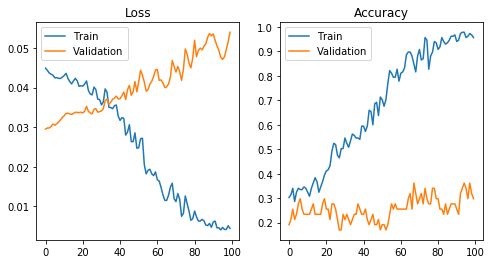

## LSTM

In [8]:
model = LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)
del model

Training Progress: 	Epoch 1 [0/185 (0.00%)]		Loss: 1.44023
	Train loss: 0.04513, Accuracy: 46/185 (24.86%)
	Validation loss: 0.02957, Accuracy: 10/47 (21.28%)
	Test loss: 0.02788, Accuracy: 16/50 (32.00%)

Training Progress: 	Epoch 2 [0/185 (0.00%)]		Loss: 1.32899
	Train loss: 0.04511, Accuracy: 46/185 (24.86%)
	Validation loss: 0.02965, Accuracy: 10/47 (21.28%)
	Test loss: 0.02812, Accuracy: 16/50 (32.00%)

Training Progress: 	Epoch 3 [0/185 (0.00%)]		Loss: 1.34386
	Train loss: 0.04502, Accuracy: 54/185 (29.19%)
	Validation loss: 0.02968, Accuracy: 8/47 (17.02%)
	Test loss: 0.02812, Accuracy: 15/50 (30.00%)

Training Progress: 	Epoch 4 [0/185 (0.00%)]		Loss: 1.39260
	Train loss: 0.04482, Accuracy: 61/185 (32.97%)
	Validation loss: 0.02967, Accuracy: 9/47 (19.15%)
	Test loss: 0.02824, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 5 [0/185 (0.00%)]		Loss: 1.37196
	Train loss: 0.04417, Accuracy: 67/185 (36.22%)
	Validation loss: 0.02962, Accuracy: 10/47 (21.28%)
	Test loss: 0.02811

Best validation accuracy:
0.3617021276595745

Best test accuracy:
0.38

## Plotting Metrics v/s Number of Epochs: 
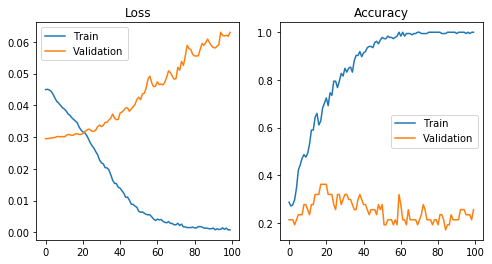

## CNN + LSTM

In [10]:
model = CNN_LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)
del model

Training Progress: 	Epoch 1 [0/185 (0.00%)]		Loss: 1.39944
	Train loss: 0.04505, Accuracy: 46/185 (24.86%)
	Validation loss: 0.02942, Accuracy: 10/47 (21.28%)
	Test loss: 0.02754, Accuracy: 16/50 (32.00%)

Training Progress: 	Epoch 2 [0/185 (0.00%)]		Loss: 1.39337
	Train loss: 0.04499, Accuracy: 46/185 (24.86%)
	Validation loss: 0.02945, Accuracy: 10/47 (21.28%)
	Test loss: 0.02760, Accuracy: 16/50 (32.00%)

Training Progress: 	Epoch 3 [0/185 (0.00%)]		Loss: 1.38908
	Train loss: 0.04492, Accuracy: 46/185 (24.86%)
	Validation loss: 0.02947, Accuracy: 10/47 (21.28%)
	Test loss: 0.02763, Accuracy: 16/50 (32.00%)

Training Progress: 	Epoch 4 [0/185 (0.00%)]		Loss: 1.38567
	Train loss: 0.04480, Accuracy: 69/185 (37.30%)
	Validation loss: 0.02946, Accuracy: 16/47 (34.04%)
	Test loss: 0.02762, Accuracy: 17/50 (34.00%)

Training Progress: 	Epoch 5 [0/185 (0.00%)]		Loss: 1.38171
	Train loss: 0.04465, Accuracy: 60/185 (32.43%)
	Validation loss: 0.02938, Accuracy: 10/47 (21.28%)
	Test loss: 0.027

Best validation accuracy:
0.6834

Best test accuracy:
0.62

## Plotting Metrics v/s Number of Epochs: 
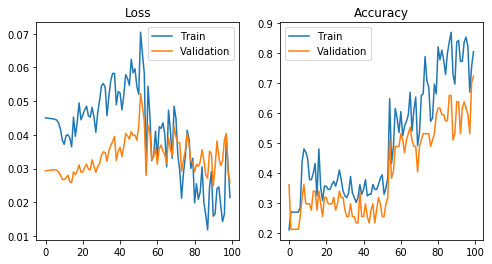

## GRU

In [9]:
model = GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)
del model

Training Progress: 	Epoch 1 [0/185 (0.00%)]		Loss: 1.40374
	Train loss: 0.04495, Accuracy: 51/185 (27.57%)
	Validation loss: 0.03007, Accuracy: 9/47 (19.15%)
	Test loss: 0.02848, Accuracy: 7/50 (14.00%)

Training Progress: 	Epoch 2 [0/185 (0.00%)]		Loss: 1.36826
	Train loss: 0.04485, Accuracy: 50/185 (27.03%)
	Validation loss: 0.03018, Accuracy: 10/47 (21.28%)
	Test loss: 0.02884, Accuracy: 7/50 (14.00%)

Training Progress: 	Epoch 3 [0/185 (0.00%)]		Loss: 1.24994
	Train loss: 0.04428, Accuracy: 59/185 (31.89%)
	Validation loss: 0.03000, Accuracy: 11/47 (23.40%)
	Test loss: 0.02884, Accuracy: 8/50 (16.00%)

Training Progress: 	Epoch 4 [0/185 (0.00%)]		Loss: 1.25289
	Train loss: 0.04330, Accuracy: 66/185 (35.68%)
	Validation loss: 0.02988, Accuracy: 8/47 (17.02%)
	Test loss: 0.02868, Accuracy: 7/50 (14.00%)

Training Progress: 	Epoch 5 [0/185 (0.00%)]		Loss: 1.27973
	Train loss: 0.04263, Accuracy: 77/185 (41.62%)
	Validation loss: 0.03001, Accuracy: 10/47 (21.28%)
	Test loss: 0.02869, Ac

Best validation accuracy:
0.3908

Best test accuracy:
0.38

## Plotting Metrics v/s Number of Epochs: 
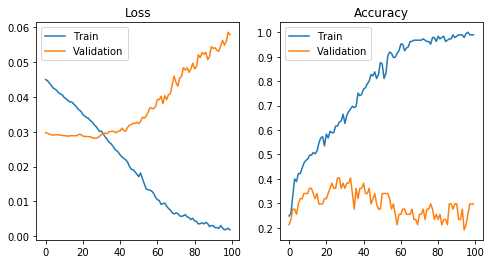

## CNN + GRU

In [11]:
model = CNN_GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/185 (0.00%)]		Loss: 1.38984
	Train loss: 0.04497, Accuracy: 51/185 (27.57%)
	Validation loss: 0.02951, Accuracy: 9/47 (19.15%)
	Test loss: 0.02814, Accuracy: 7/50 (14.00%)

Training Progress: 	Epoch 2 [0/185 (0.00%)]		Loss: 1.37248
	Train loss: 0.04478, Accuracy: 51/185 (27.57%)
	Validation loss: 0.02952, Accuracy: 9/47 (19.15%)
	Test loss: 0.02807, Accuracy: 7/50 (14.00%)

Training Progress: 	Epoch 3 [0/185 (0.00%)]		Loss: 1.37837
	Train loss: 0.04418, Accuracy: 60/185 (32.43%)
	Validation loss: 0.02931, Accuracy: 10/47 (21.28%)
	Test loss: 0.02767, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 4 [0/185 (0.00%)]		Loss: 1.35559
	Train loss: 0.04303, Accuracy: 67/185 (36.22%)
	Validation loss: 0.02869, Accuracy: 12/47 (25.53%)
	Test loss: 0.02694, Accuracy: 15/50 (30.00%)

Training Progress: 	Epoch 5 [0/185 (0.00%)]		Loss: 1.30789
	Train loss: 0.04149, Accuracy: 71/185 (38.38%)
	Validation loss: 0.02788, Accuracy: 13/47 (27.66%)
	Test loss: 0.02624, 

Best validation accuracy:
0.6907

Best test accuracy:
0.42

## Plotting Metrics v/s Number of Epochs: 
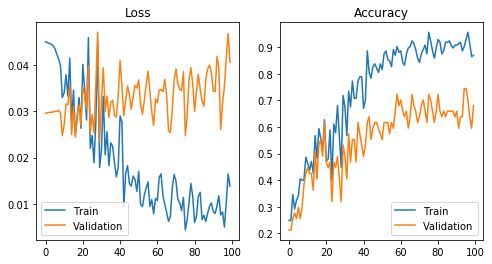